In [517]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import gmean

import os

In [518]:
base_file = "./results"
directories_name_list = os.listdir(base_file)
directories_name_list.sort()

ipc = np.zeros((6, 18))

In [519]:
i=0
for dir in directories_name_list:
    j=0
    file_names = os.listdir(os.path.join("./results",dir))
    file_names.sort()
    for file in file_names:
        f = open(os.path.join(os.path.join("./results",dir),file))
        lines = f.readlines()
        ipc[i][j] = (((lines[18]).strip()).split(" "))[9]
        j += 1
    i += 1


In [520]:
ipc_n_1 = ipc/ipc[4,:]
ipc_n_1 = np.delete(ipc_n_1, 4, 0)

ipc_n_1[[0,1]] = ipc_n_1[[1,0]]
print(ipc_n_1[3,5],ipc_n_1[4,5] )

0.9382040030811862 0.9641996667790529


In [521]:
ipc_n_2 = np.zeros((5, 7))
ipc_n_2[:,0] = (ipc_n_1[:,0] * ipc_n_1[:,1] * ipc_n_1[:,2])**(1/3)
ipc_n_2[:,1] = (ipc_n_1[:,3] * ipc_n_1[:,4] * ipc_n_1[:,5])**(1/3)
ipc_n_2[:,2] = (ipc_n_1[:,6] * ipc_n_1[:,7] * ipc_n_1[:,8])**(1/3)
ipc_n_2[:,3] = (ipc_n_1[:,9] * ipc_n_1[:,10] * ipc_n_1[:,11])**(1/3)
ipc_n_2[:,4] = (ipc_n_1[:,12] * ipc_n_1[:,13] * ipc_n_1[:,14])**(1/3)
ipc_n_2[:,5] = (ipc_n_1[:,15] * ipc_n_1[:,16] * ipc_n_1[:,17])**(1/3)
ipc_n_2[:,6] = gmean(ipc_n_1, axis=1)
ipc_n_2 -= 1
ipc_n_1 -= 1


[0.47158922 0.47808922 0.50201149 0.03779875 0.03960401]


Text(0.5, 1.0, 'effect on ipc')

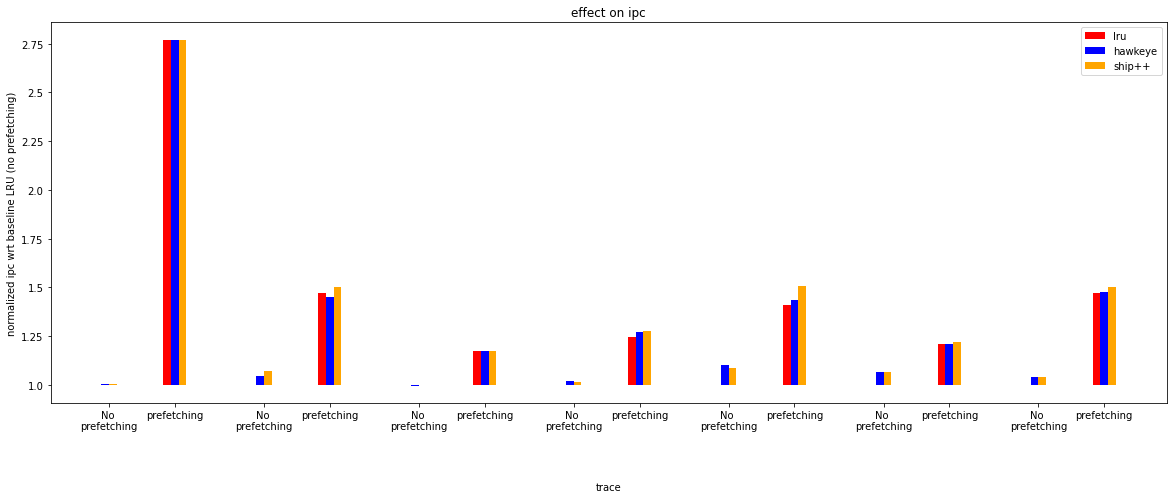

In [522]:
X_label = ["No \nprefetching\n\n\n\n", "prefetching\n\n\n\n"]*7
plt.figure(figsize=(20,7))
labels = {0:'lru',1 : 'hawkeye',2: 'ship++'}

X = np.arange(7)
# X = X/3

X_t = np.zeros(14)
for i in range(14):
    if(i%2==0):
       X_t[i] = i//2
    else:
        X_t[i] = (i//2)+0.425
X_t += 0.025


plt.bar(X,ipc_n_2[3,:],0.05, color='blue')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+1))
plt.bar(X+0.05,ipc_n_2[4,:],0.05, color='orange')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+1))

plt.bar(X+0.4,ipc_n_2[0,:],0.05, label= labels[0], color='red')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+1))
plt.bar(X+0.45,ipc_n_2[1,:],0.05, label= labels[1], color='blue')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+1))
plt.bar(X+0.5,ipc_n_2[2,:],0.05, label= labels[2], color='orange')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+1))

plt.xticks(X_t,X_label)
plt.yticks()
plt.ylabel('normalized ipc wrt baseline LRU (no prefetching)')
plt.xlabel('trace')
plt.legend()
plt.title('effect on ipc')


Text(0.5, 1.0, 'effect on ipc with prefetching')

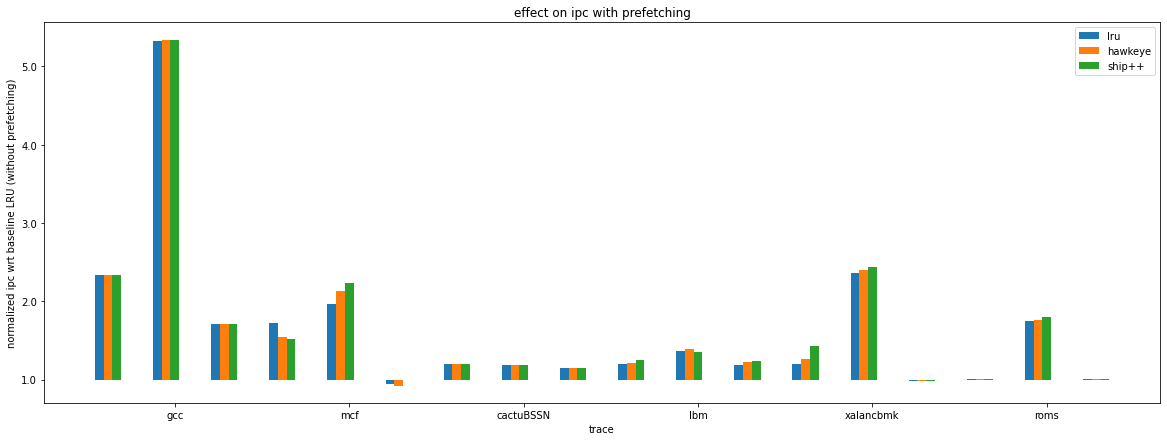

In [523]:
# with prefetching
labels = {0:'lru',1 : 'hawkeye',2: 'ship++'}
plt.figure(figsize=(20,7))
X_label = ['gcc', 'mcf', 'cactuBSSN', 'lbm', 'xalancbmk', 'roms']

X = np.arange(18)
X = X/3
X_t = np.zeros(6)
j=0
for i in range(1,18,3):
    X_t[j] = X[i]
    j+=1
X_t += 0.1

for i in range(3):
    plt.bar(X+0.05*i,ipc_n_1[i,:],0.05, label= labels[i])
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+1))


plt.xticks(X_t,X_label)
plt.yticks()
plt.ylabel('normalized ipc wrt baseline LRU (without prefetching)')
plt.xlabel('trace')
plt.legend()
plt.title('effect on ipc with prefetching')


Text(0.5, 1.0, 'effect on ipc without prefetching')

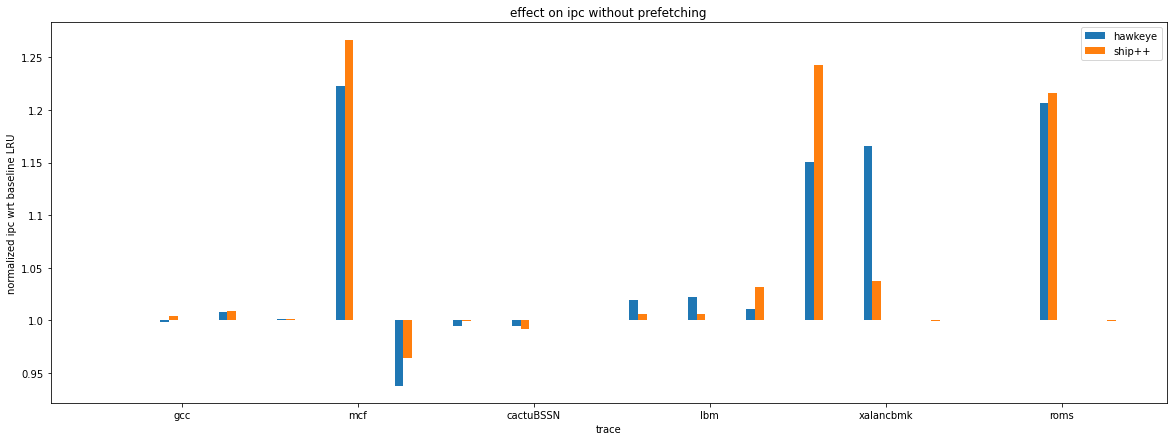

In [524]:
# without prefetching
labels = {3 : 'hawkeye',4: 'ship++'}
plt.figure(figsize=(20,7))
X_label = ['gcc', 'mcf', 'cactuBSSN', 'lbm', 'xalancbmk', 'roms']

X = np.arange(18)
X = X/3
X_t = np.zeros(6)
j=0
for i in range(1,18,3):
    X_t[j] = X[i]
    j+=1
X_t += 0.1

for i in range(3,5):
    plt.bar(X+0.05*(i-3),ipc_n_1[i,:],0.05, label= labels[i])
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+1))


plt.xticks(X_t,X_label)
plt.yticks()
plt.ylabel('normalized ipc wrt baseline LRU')
plt.xlabel('trace')
plt.legend()
plt.title('effect on ipc without prefetching')


Text(0.5, 1.0, 'effect on ipc')

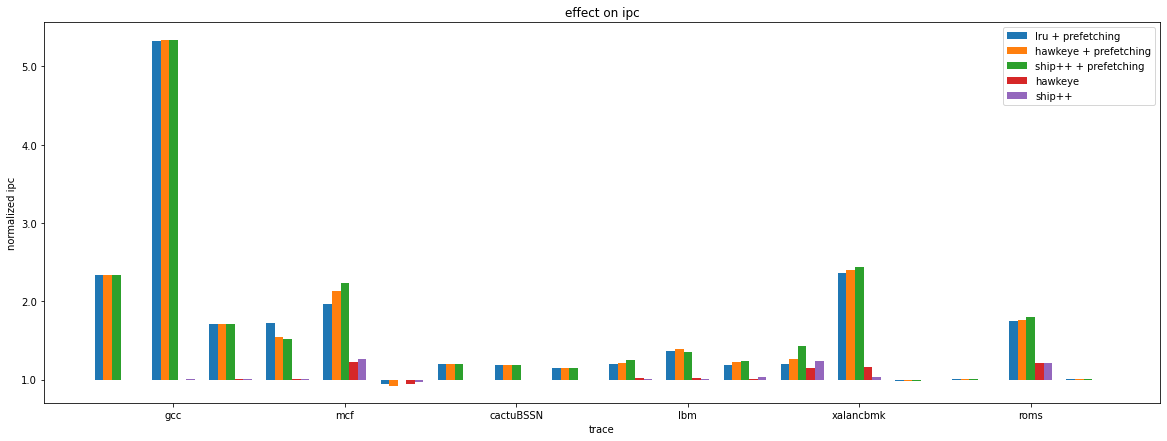

In [525]:
labels = {0:'lru + prefetching',1 : 'hawkeye + prefetching',2: 'ship++ + prefetching',3: 'hawkeye',4: 'ship++'}
plt.figure(figsize=(20,7))
X_label = ['gcc', 'mcf', 'cactuBSSN', 'lbm', 'xalancbmk', 'roms']

X = np.arange(18)
X = X/3
X_t = np.zeros(6)
j=0
for i in range(1,18,3):
    X_t[j] = X[i]
    j+=1
X_t += 0.1

for i in range(5):
    plt.bar(X+0.05*i,ipc_n_1[i,:],0.05, label= labels[i])
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x+1))


plt.xticks(X_t,X_label)
plt.yticks()
plt.ylabel('normalized ipc')
plt.xlabel('trace')
plt.legend()
plt.title('effect on ipc')